<a href="https://colab.research.google.com/github/Sanskriti0204/PracticeCodes/blob/main/SpamNotSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spam Classification
1. Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('spam.tsv',sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()/len(df)

,count
label,
ham,0.865937
spam,0.134063


In [ ]:
ham=df[df['label']=='ham']
print(ham)

     label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
6      ham  Even my brother is not like to speak with me. ...      77      2
...    ...                                                ...     ...    ...
5565   ham                                       Huh y lei...      12      3
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[4825 rows x 4 columns]


In [ ]:
spam=df[df['label']=='spam']
print(spam)

     label                                            message  length  punct
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
5     spam  FreeMsg Hey there darling it's been 3 week's n...     147      8
8     spam  WINNER!! As a valued network customer you have...     157      6
9     spam  Had your mobile 11 months or more? U R entitle...     154      2
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136      8
...    ...                                                ...     ...    ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8

[747 rows x 4 columns]


In [ ]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [ ]:
data = pd.concat([ham, spam], ignore_index=True)

In [ ]:
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

,count
label,
ham,747
spam,747


In [ ]:
data.head()

,label,message,length,punct
0,ham,Honey ? Sweetheart ? Darling ? Sexy buns ? Sug...,135,13
1,ham,Sorry to be a pain. Is it ok if we meet anothe...,195,5
2,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,152,7
3,ham,"Haha awesome, I might need to take you up on t...",73,3
4,ham,"Tonight? Yeah, I'd be down for that",35,3


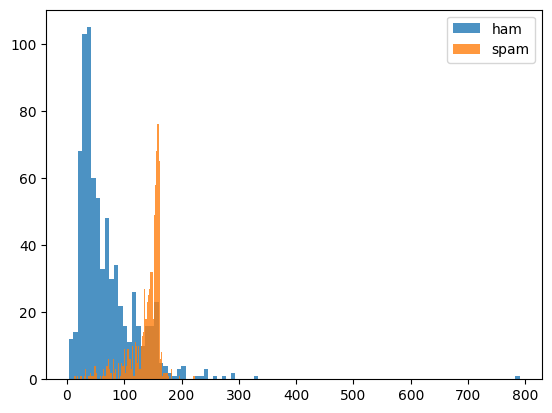

In [ ]:
from re import A
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.8)
plt.legend(['ham','spam'])
plt.show()

Building dataset

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1045,), (449,), (1045,), (449,))

Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',RandomForestClassifier(n_estimators=10))
])
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[222,   5],
       [ 26, 196]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.93       227
        spam       0.98      0.88      0.93       222

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc=Pipeline([( "tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [ ]:
confusion_matrix(y_test,y_pred)

array([[222,   5],
       [ 20, 202]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [ ]:
test1=["Hello,You are learning natural language processing"]
test2=['Hope you are doing good and learning new things!']
test3=['Congratulation, You won a lottery ticket worth $1 million! To claim call on 123456']

In [ ]:
classifier.predict(test1)
classifier.predict(test2)
classifier.predict(test3)
